### 1)identification of the probleme
.probleme overexplained
   today online transaction have dominent our world since the covid 19 and the technological advencent 
   as you can see from the diagrame we are becoming more and more dependentless from the old way of payment 
   but of course as bank,or any orgination that give this service there is a trade off:with the abilty of receving money off     your custormers directly wit ,you have the posibilty od receving a faulty trabsactiion ,ether from the user or the 
   organisation .and regarding how much tranaction processding , a human being can not indentify all the faulty transaction .
      so here came the need of au an automated tools that help during this process of protecting the user from waking up in the       mornig and founding that his credit card got used to paying a party 
       
          build and train a ML model to identify faulty tranaction so we can prevent them in the future

# 2)understanding the data 
        the data contains 14 column:
        index - Unique Identifier for each row
        transdatetrans_time - Transaction DateTime
        cc_num - Credit Card Number of Customer
        merchant - Merchant Name
        category - Category of Merchant
        amt - Amount of Transaction
        first - First Name of Credit Card Holder
        last - Last Name of Credit Card Holder
        gender - Gender of Credit Card Holder
        street - Street Address of Credit Card Holder
        city - City of Credit Card Holder
        state - State of Credit Card Holder
        zip - Zip of Credit Card Holder
        lat - Latitude Location of Credit Card Holder
        long - Longitude Location of Credit Card Holder
        city_pop - Credit Card Holder's City Population
        job - Job of Credit Card Holder
        dob - Date of Birth of Credit Card Holder
        trans_num - Transaction Number
        unix_time - UNIX Time of transaction
        merch_lat - Latitude Location of Merchant
        merch_long - Longitude Location of Merchant
        is_fraud - Fraud Flag <--- Target Class

In [1]:
### import all the tools 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler as sd
from  imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


In [2]:
## PREPARE THE DATA
data0=pd.read_csv('fraudTrain.csv')
data1=pd.read_csv('fraudTest.csv')
data=pd.concat([data0,data1]).reset_index()
data.drop(['Unnamed: 0','index'],axis=1,inplace=True)
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
##SPLIT THE trans_date_trans_time COLUMN TO DAY,hour,year
# converting trans_date_trans_time into datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
#add hour colomn
data['hour'] = data['trans_date_trans_time'].dt.hour
#add day of the week
data['day_of_week'] = data['trans_date_trans_time'].dt.day_name()
#add month 
data['month'] = data['trans_date_trans_time'].dt.month_name()

#add year
data['year'] = data['trans_date_trans_time'].dt.year
##add age column 
data['age_holder']=2022-pd.to_datetime(data['dob']).dt.year
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day_of_week,month,year,age_holder
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Tuesday,January,2019,34
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Tuesday,January,2019,44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Tuesday,January,2019,60
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Tuesday,January,2019,55
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Tuesday,January,2019,36


In [4]:
#delete all the column that can be linked from another existing columns
data.drop(['trans_date_trans_time',
    'trans_num',#the uniqness of the row can be stored with indexes instead
           'first',#droped because all user will be reffrenced only with their credigt card number
           'last',#droped because all user will be reffrenced only with their credigt card number
           'merch_lat',#out of context
           'merch_long',#out of context
           'dob',#replaced by the age 
           'job',#can be utile to classifie faulty transaction's holder
           'state'#same
           ,'street'#not helpful
           ,'city_pop'#not helpful
           ,'unix_time'#not helpful
           ,'lat'#not helpful
           ,'long'#not helpful
          ],axis=1,inplace=True)

data.head()

,cc_num,merchant,category,amt,gender,city,zip,is_fraud,hour,day_of_week,month,year,age_holder
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,28654,0,0,Tuesday,January,2019,34
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,99160,0,0,Tuesday,January,2019,44
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,83252,0,0,Tuesday,January,2019,60
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,59632,0,0,Tuesday,January,2019,55
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,24433,0,0,Tuesday,January,2019,36


In [5]:
data[data['is_fraud']==1]

,cc_num,merchant,category,amt,gender,city,zip,is_fraud,hour,day_of_week,month,year,age_holder
2449,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,28611,1,1,Wednesday,January,2019,34
2472,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,78208,1,1,Wednesday,January,2019,62
2523,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,78208,1,3,Wednesday,January,2019,62
2546,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,M,Collettsville,28611,1,3,Wednesday,January,2019,34
2553,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,F,San Antonio,78208,1,3,Wednesday,January,2019,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813872,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,M,Senatobia,38668,1,22,Tuesday,December,2020,63
1813949,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,M,Senatobia,38668,1,22,Tuesday,December,2020,63
1814016,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,M,Senatobia,38668,1,22,Tuesday,December,2020,63
1814204,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,M,Senatobia,38668,1,23,Tuesday,December,2020,63


# 4)EDA(exploratory data analysis):
     first impression
     DESCRIPTION FOR THE DATASET

In [6]:
## global statistic:

data.nunique()



cc_num           999
merchant         693
category          14
amt            60616
gender             2
city             906
zip              985
is_fraud           2
hour              24
day_of_week        7
month             12
year               2
age_holder        82
dtype: int64

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

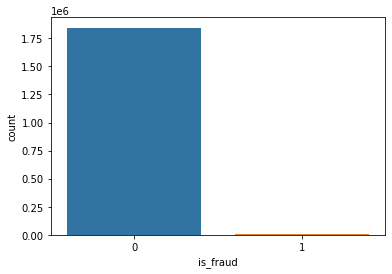

In [7]:
# general statistic on each numerical column 
data.describe()
# number of fruad vs non frauds sample and % ===> conclusion need for data balncing
data['is_fraud'].value_counts()/len(data)
sns.countplot(x='is_fraud',data=data)

## the data is imbalenced so next we will test it in three difftrent scinario:
    overfit the positive class 
    underfit the negative class
    SMOT technique

# let's explore most relation between the feature

## Effect of the amount on the faulty transaction

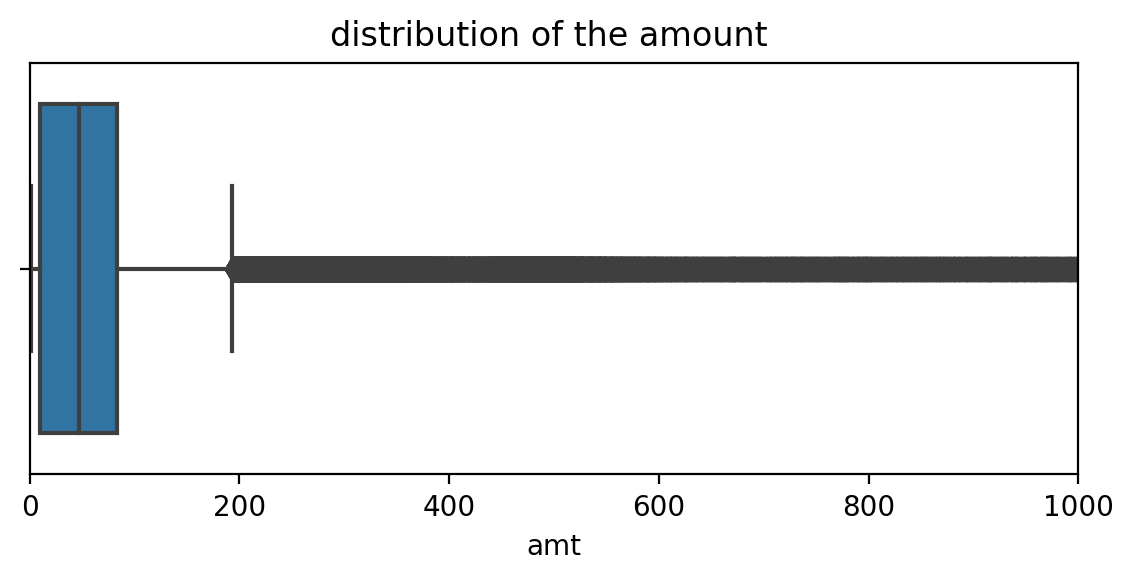

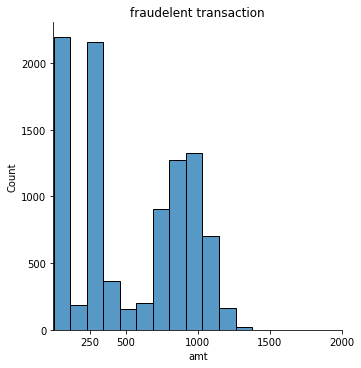

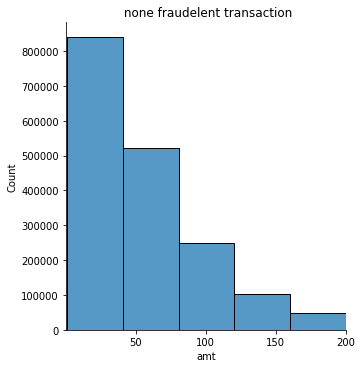

<Figure size 4600x1200 with 0 Axes>

In [8]:
# fig,axes=plt.subplots(nrows=3,ncols=2)
#  showing outliers ===>
plt.figure(figsize=(23,6),dpi=200)
axes=[]
axes.append(sns.boxplot(x='amt',data=data,ax=plt.subplot(234)))
plt.xlim((0,1000))
axes[0].set_title('distribution of the amount ')
plt.show()

#     dist on the fraud 
axes.append(sns.displot(x='amt',data=data[(data['amt']<2000)&data['is_fraud']==1],bins=12))
axes.append(sns.displot(x='amt',data=data[(data['amt']<200)&(data['is_fraud']==0)],bins=5))
# axes[1].axes[0][0].set_ylim((0,1000))
axes[1].axes[0][0].set_title('fraudelent transaction')
axes[1].set(xlim=(0, 2000), xticks=[250,500,1000,1500,2000])
axes[2].axes[0][0].set_title(' none fraudelent transaction')

axes[2].set(xlim=(0, 200), xticks=[50,100,150,200])
plt.figure(figsize=(23,6),dpi=200)
plt.show()


# .### observation and precaution
from the boxplot we can say that 50% of amount tranaction data are <200$ and looking more into the fraudelent tranaction i found that most of the them are >500$
if we take that into considiration, any transaction that had more that 500$ should be controled and confirmed by a human contact

### data VS FRAUD OF ALL TRANSACTION PER DAYS  WE WILL DISCOVER HOW MUCH FRAUD ATTEMP WHER COMMITED and how are the fraud distrubuted througth the time

                is_fraud
year month              
2019 April         68078
     August        87359
     December     141060
     February      49866
     January       52525
     July          86596
     June          86064
     March         70939
     May           72532
     November      70421
     October       68758
     September     70652
2020 April         66892
     August        88759
     December     139538
     February      47791
     January       52202
     July          85848
     June          87805
     March         72850
     May           74343
     November      72635
     October       69348
     September     69533


<AxesSubplot:xlabel='year', ylabel='frauds%'>

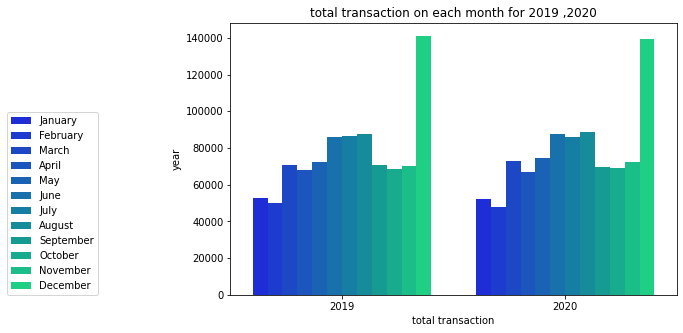

<Figure size 2400x2400 with 0 Axes>

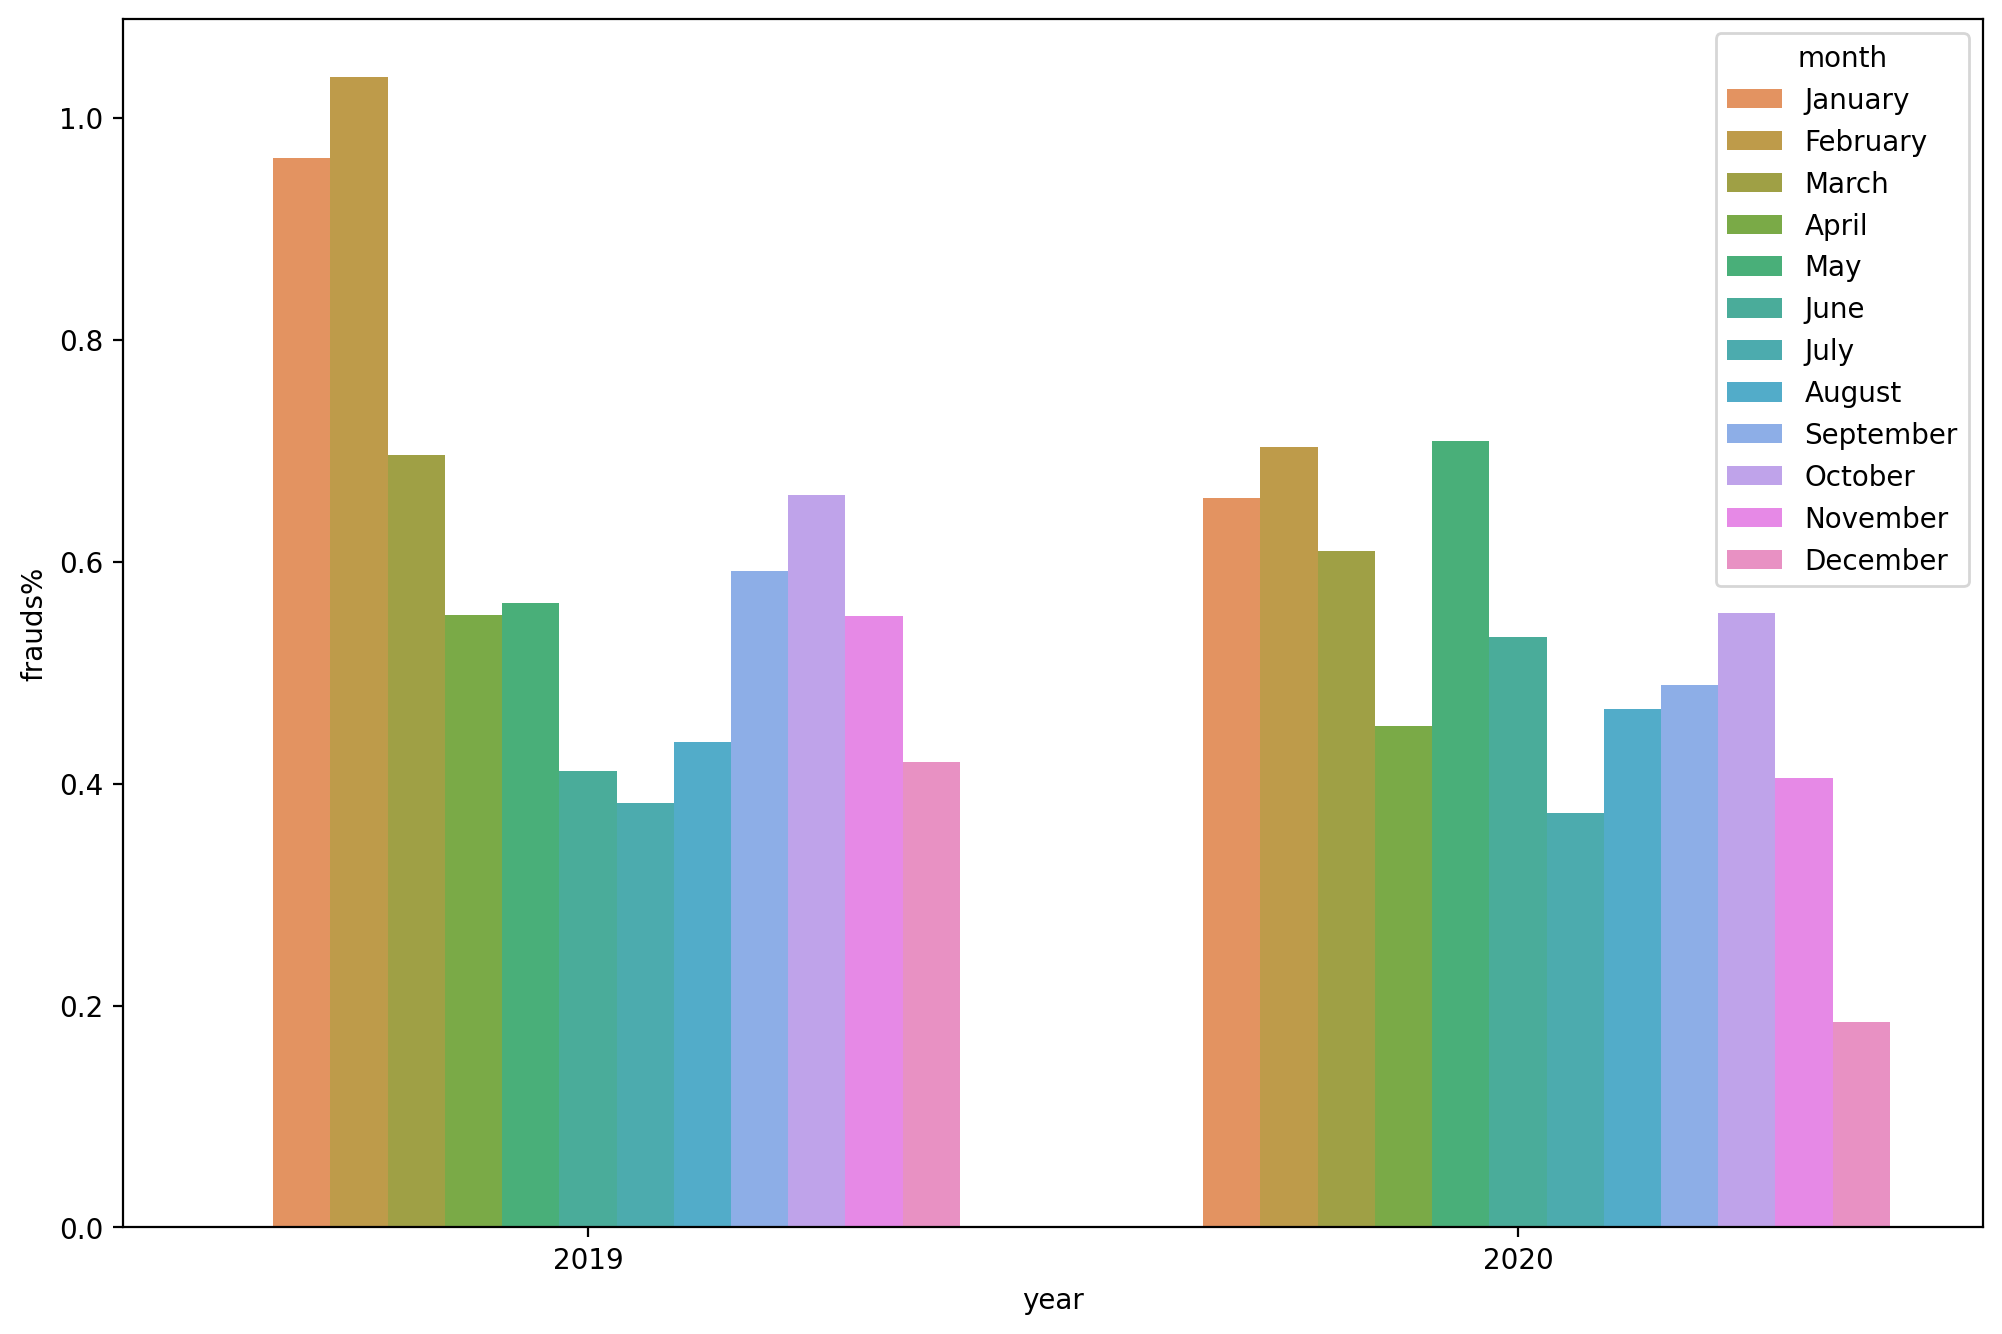

In [9]:
import calendar

fraud_per_day=data[['day_of_week','is_fraud']].groupby('day_of_week').count()
fig = plt.figure(figsize=(8,5))
#    YEARS 
fraud_per_year=data[['year','month','is_fraud']].groupby(['year','month']).count()
print(fraud_per_year)
trans_per_year=sns.countplot(x='year',data=data,hue='month',palette='winter')
trans_per_year.legend(loc=(-0.5,0))
trans_per_year.set_title("total transaction on each month for 2019 ,2020")
trans_per_year.set_xlabel('total transaction')
trans_per_year.set_ylabel('year')

frauds=data[data['is_fraud']==1]
fraud_per_year=data[['year','month','is_fraud']].groupby(['year','month']).count()
fraud_per_year.columns=['total transaction']
f=frauds[['year','month','is_fraud']].groupby(['year','month']).count()
f.columns=['faulty transaction']
results_date=pd.merge(on=['year','month'],left=fraud_per_year,right=f,how='outer')
results_date['frauds%']=results_date['faulty transaction']*100/results_date['total transaction']
#    WE WILL DISCOVER HOW MUCH FRAUD ATTEMP WHER COMMITE
plt.figure(figsize=(12,12),dpi=200)
results_date

results_date=results_date.reset_index()

## observation(date)

plt.figure(figsize=(12,8),dpi=200)
sns.barplot(y=results_date['frauds%'] ,x=results_date['year'],data=results_date,hue='month',hue_order=list(calendar.month_name))

### observation and precaution
    january and december are the most month were most transaction, not only that ,the last diagram shows that they are also the first 2 to be suspected, so we should control the transaction more offten on this months (at least)

### DOES GENDER AFFECT THE FRAUD VARIABLE
     diagrames for distrubution of data on gender and for the frauds non fraud

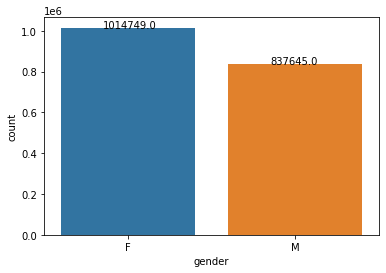

,total transaction,faulty transaction,frauds%
gender,,,
F,1014749,4899,0.482779
M,837645,4752,0.567305


In [10]:
# dist of dataset over the gender with the two target category
ax=sns.countplot(x='gender',data=data)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()
frauds=data[data['is_fraud']==1]
fraud_per_year=data[['gender','is_fraud']].groupby(['gender',]).count()
fraud_per_year.columns=['total transaction']
f=frauds[['gender','is_fraud']].groupby(['gender']).count()
f.columns=['faulty transaction']
results_gender=pd.merge(on='gender',left=fraud_per_year,right=f,how='outer')

results_gender['frauds%']=results_gender['faulty transaction']*100/results_gender['total transaction']
results_gender


### observation and precaution
   nothing can't be concluded from this analyst , although the gender doesn't have an effect,we can notice that femal tend to use their credit card more offten than man,

In [11]:
### kde of the distrubtion of diffrent sample on the age axes
# and the age of most frauded account 
plt.figure(figsize=(8,12),dpi=200)
sns.kdeplot(x='age_holder',data=data,ax=ax,label="Total Transaction") 

sns.kdeplot(data=data[data['is_fraud']==1],x='age_holder',ax=ax,label="Fraudulent Transactions")
# sns.kdeplot(data=data[data['is_fraud']==0],x='age_holder',ax=ax,label=" None Fraudulent Transactions")
ax.legend()

plt.tight_layout()
ax.set_title('Distibution of the total and fradulent transaction with age')
plt.show()


<Figure size 1600x2400 with 0 Axes>

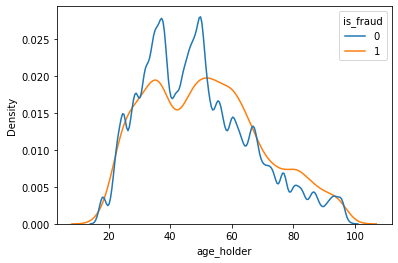

In [12]:
sns.kdeplot(data=data,x='age_holder',hue='is_fraud',common_norm=False)
plt.show()

### observation and precaution
we can clearly notice that most of credit card holder are aged between 30-40 and 45-55,so it goes to the fraudelent aged between 30-40 and 50-60
this age should be more offten supervised

### top 5 CUSTOMER THAT HAVE THE HEIGHEST DIFRENCE BETWEEN FRAUD TRNASCTION AND NON FRAUD and their behaviour

In [13]:
frauds=data[data['is_fraud']==1]
fraud_per_year=frauds[['cc_num','is_fraud']].groupby('cc_num').count().sort_values('is_fraud',ascending=False)
fraud_per_year.columns=['total frauds']
sus_list=list(fraud_per_year[:5].index)
sus_list

[4593569795412,
 4599285557366057,
 3520550088202337,
 6538441737335434,
 4260128500325]

### TOP Category THAT HAVE THE HEIGHEST DIFFRENCE BETWEEN FRAUD TRNASCTION AND NON FRAUD

In [14]:
# DIGRAME FOR SHOWING THE MOST %DIFF OF EACH CATEGORY
def fraudy(category):
    f=data[[category,'is_fraud']].groupby(category).count().sort_values('is_fraud')
    frauds=data[data['is_fraud']==1]
    g=frauds[[category,'is_fraud']].groupby(category).count().sort_values('is_fraud')
    result=pd.merge(left=f,right=g,on=category)
    result.columns=['total','faulty']
    result['%frauds']=result['faulty']*100/result['total']
    return result.sort_values('%frauds',ascending=False)
# analysing
def analyse(string):
# filtreing
    sample=data[data['merchant']==string]
    print(f"analising{string}")
    #analysing time
    #mean of amt
    return sample.describe()
fraudy('category')

,total,faulty,%frauds
category,,,
shopping_net,139322,2219,1.592713
misc_net,90654,1182,1.303859
grocery_pos,176191,2228,1.264537
shopping_pos,166463,1056,0.634375
gas_transport,188029,772,0.410575
misc_pos,114229,322,0.281890
grocery_net,64878,175,0.269737
travel,57956,156,0.269170
personal_care,130085,290,0.222931


<AxesSubplot:title={'center':'% of fraudelent tranaction in each category '}, xlabel='% of the fraudenlent transaction compared to all tranaction', ylabel='CATEGORY'>

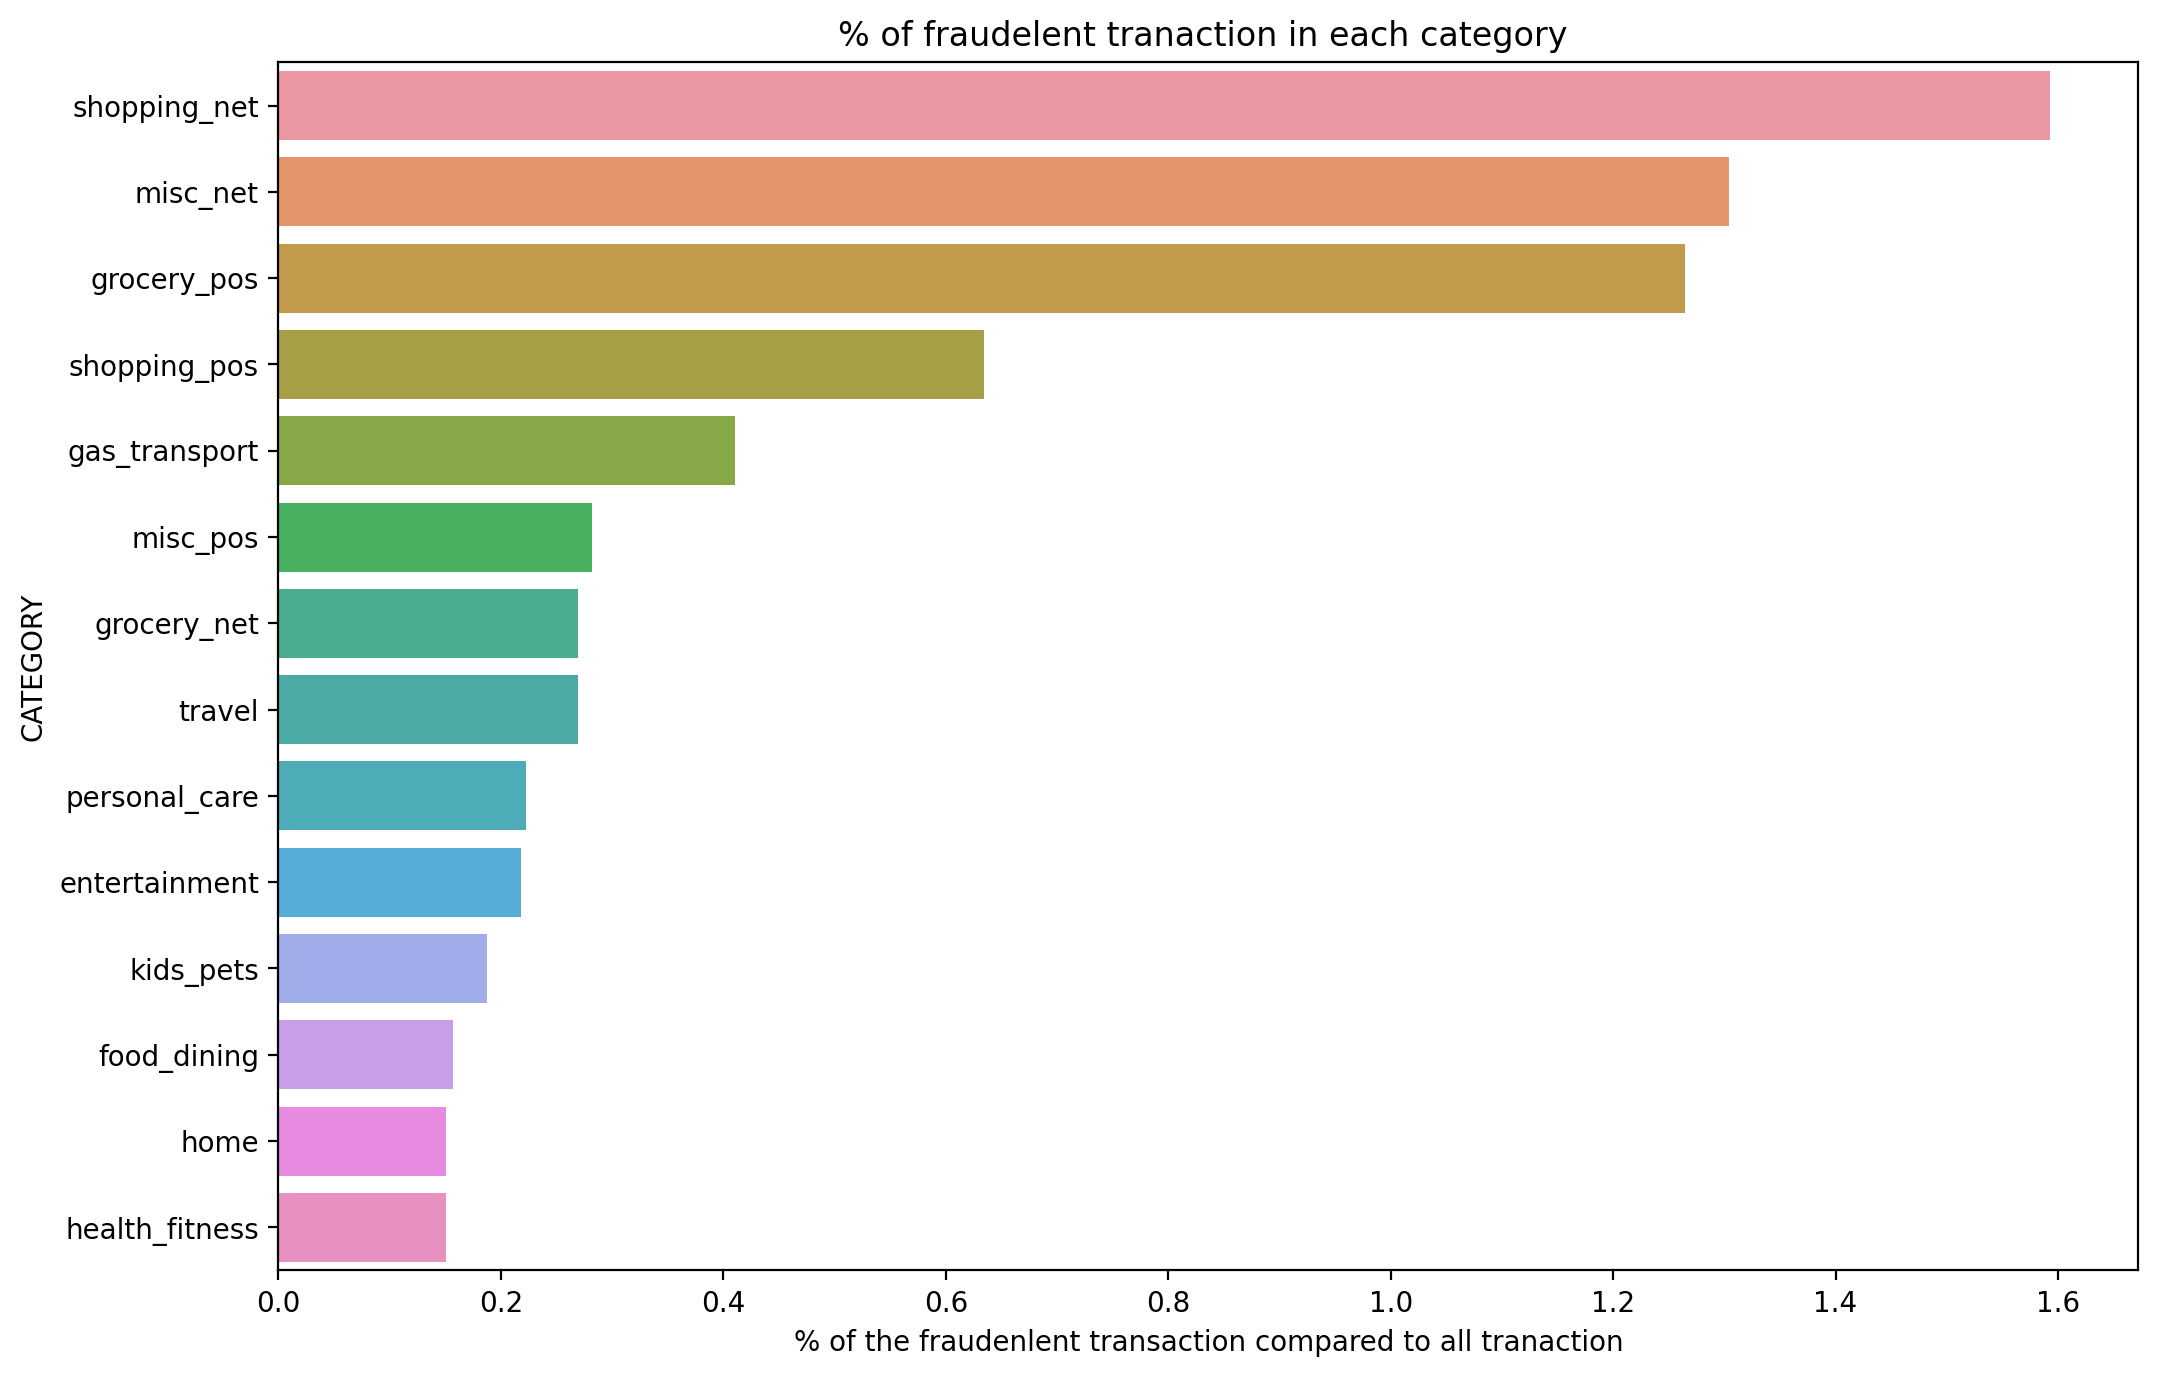

In [15]:
te=fraudy('category').reset_index()
plt.figure(figsize=(12,8),dpi=200)
def to_per(age:int):
    if age <= 20 :
        return '0<20'
    elif 20<age<=40 :
        return '20-40'
    elif 40<age<=60 :
        return '40-60'
    elif 60<age<=80 :
        return '60-80'
    elif 80<age<=100 :
        return '80-100'

ax=sns.barplot(x='%frauds',data=te,y='category')
ax.set_title("% of fraudelent tranaction in each category ")
ax.set_ylabel('CATEGORY')
ax.set_xlabel('% of the fraudenlent transaction compared to all tranaction')

ax

### observation and precaution
we can see that categories like shopping_net misc_net,grocery_pos are the most suspected to be fraudelent so more supervising is needed with is logical since women tend to shop more online

### top 5 city that had the fraud
*)distrubution of data on the city variable+frauds and the nonfruad
*)analyse the transaction per city per gender


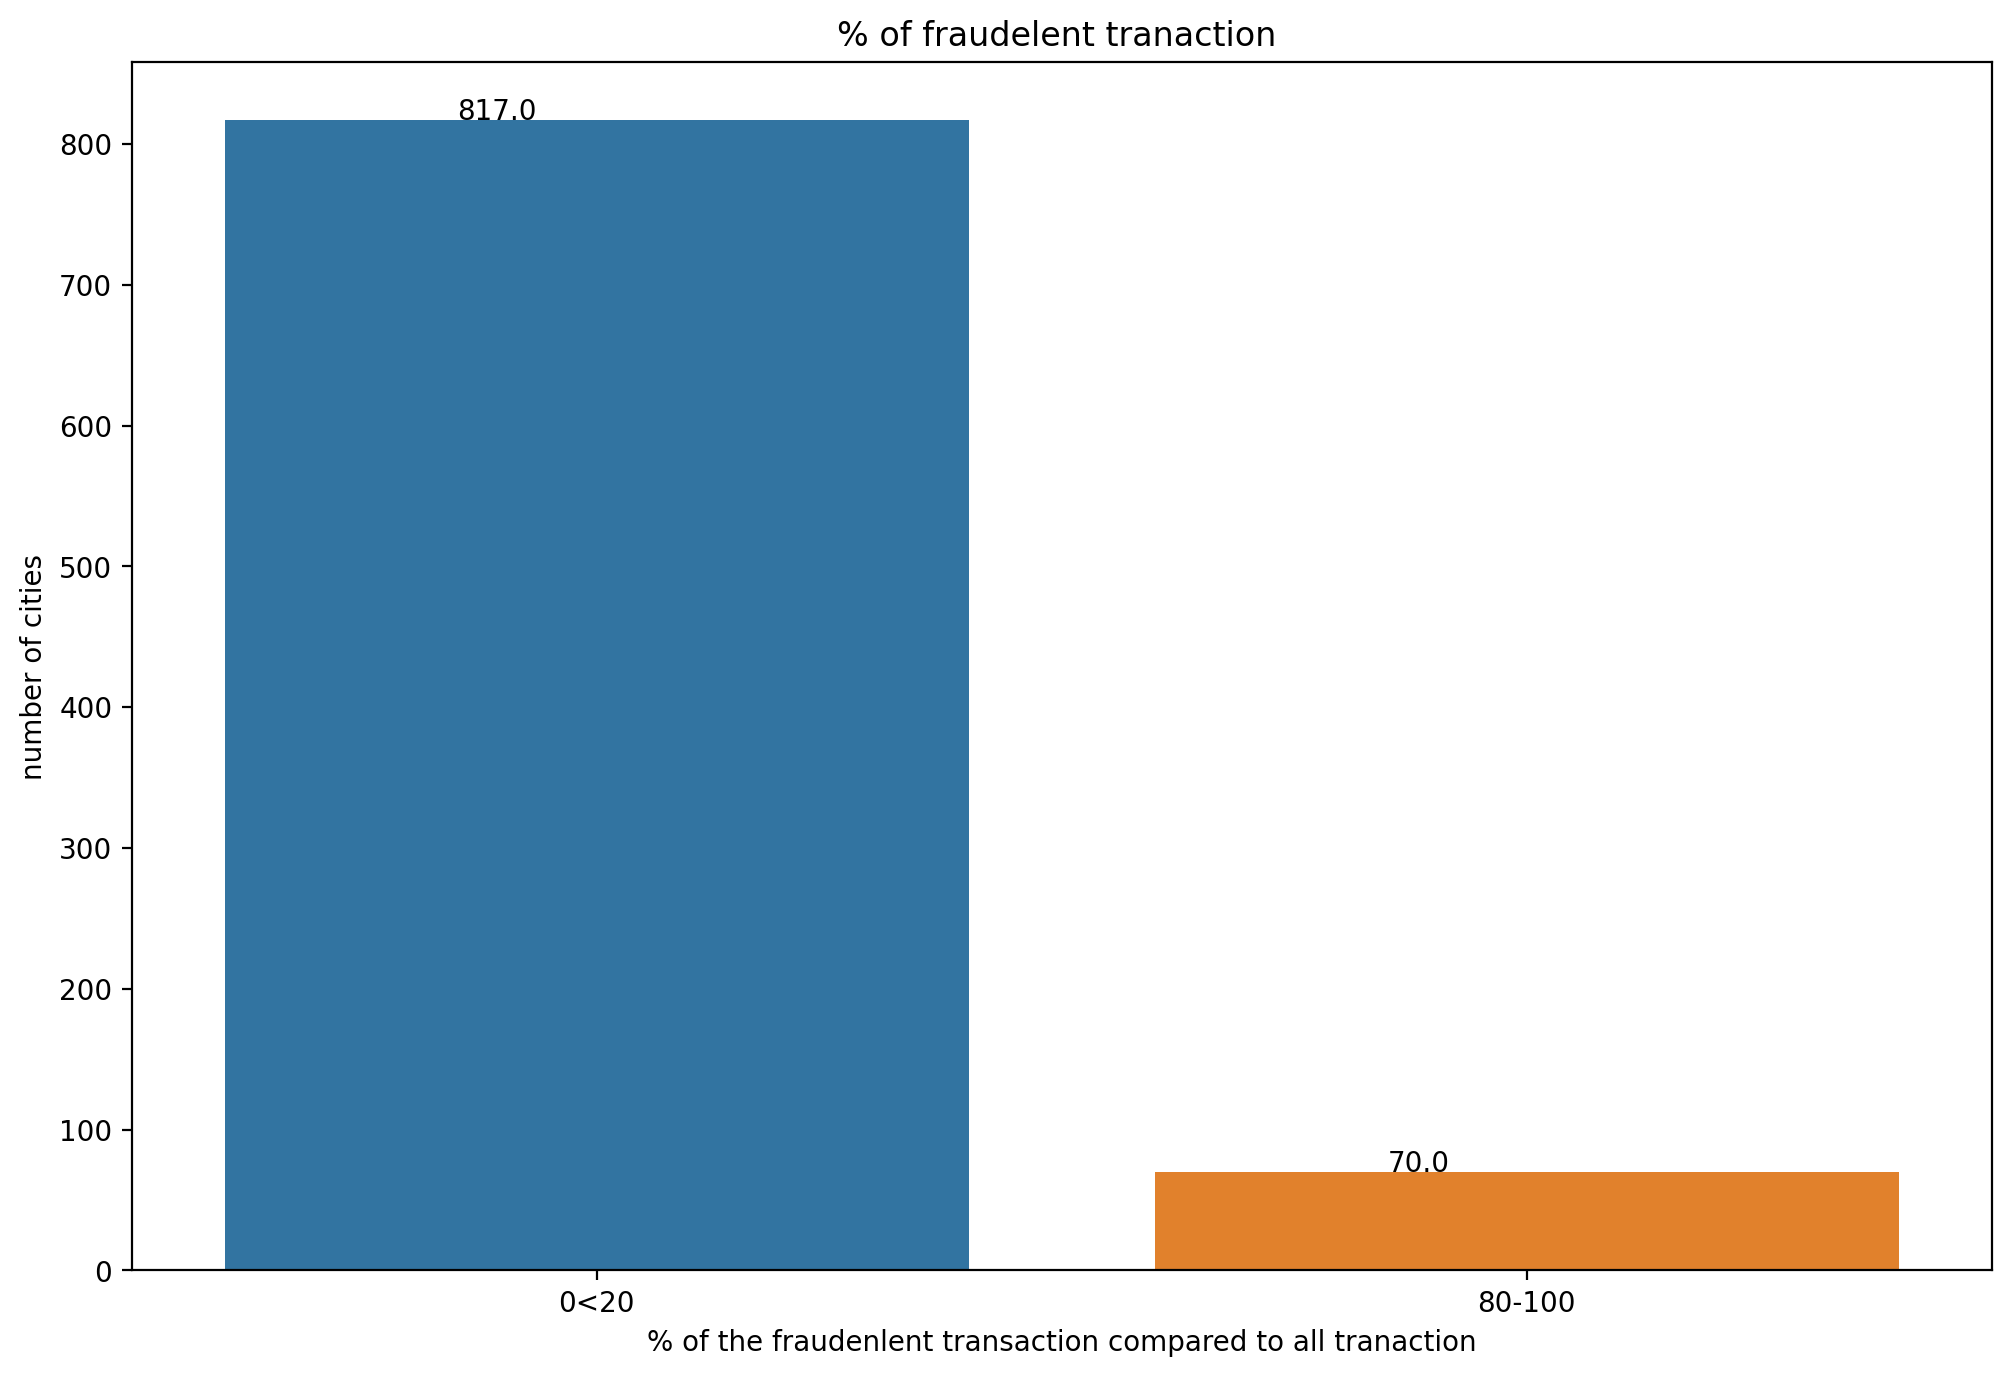

In [16]:
te=fraudy('city')
plt.figure(figsize=(12,8),dpi=200)
def to_per(age:int):
    if age <= 20 :
        return '0<20'
    elif 20<age<=40 :
        return '20-40'
    elif 40<age<=60 :
        return '40-60'
    elif 60<age<=80 :
        return '60-80'
    elif 80<age<=100 :
        return '80-100'
te['range%']=np.vectorize(to_per)(te['%frauds'])
ax=sns.countplot(x='range%',data=te.sort_values('range%'))
ax.set_title("% of fraudelent tranaction ")
ax.set_ylabel('number of cities')
ax.set_xlabel('% of the fraudenlent transaction compared to all tranaction')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

### observation and precaution
70 city are having more than 80% of their tranasction  fraudelent :the only thing said here is :putting all the tranction of these cities under control 

<Figure size 2800x1600 with 0 Axes>

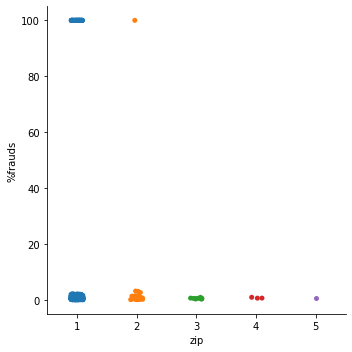

In [17]:
plt.figure(figsize=(14,8),dpi=200)

# analse the zip per city

l=data[['city','zip']].groupby(['city']).nunique().sort_values('zip',ascending=False)
rrr=pd.merge(left=fraudy('city'),right=l,on='city')
rrr[rrr['zip']>1]
sns.catplot(x='zip',y='%frauds',data=rrr,legend=True)

### observation and precaution
     even though some cities have more than one zip code ,it doesn't indicate any relationj with          fraudelent transaction

# TOP 10 MERCHANT THAT HAVE THE HEIGHEST % DIFRENCE 

Text(0.5, 0, '% of the fraudenlent transaction compared to their tranaction')

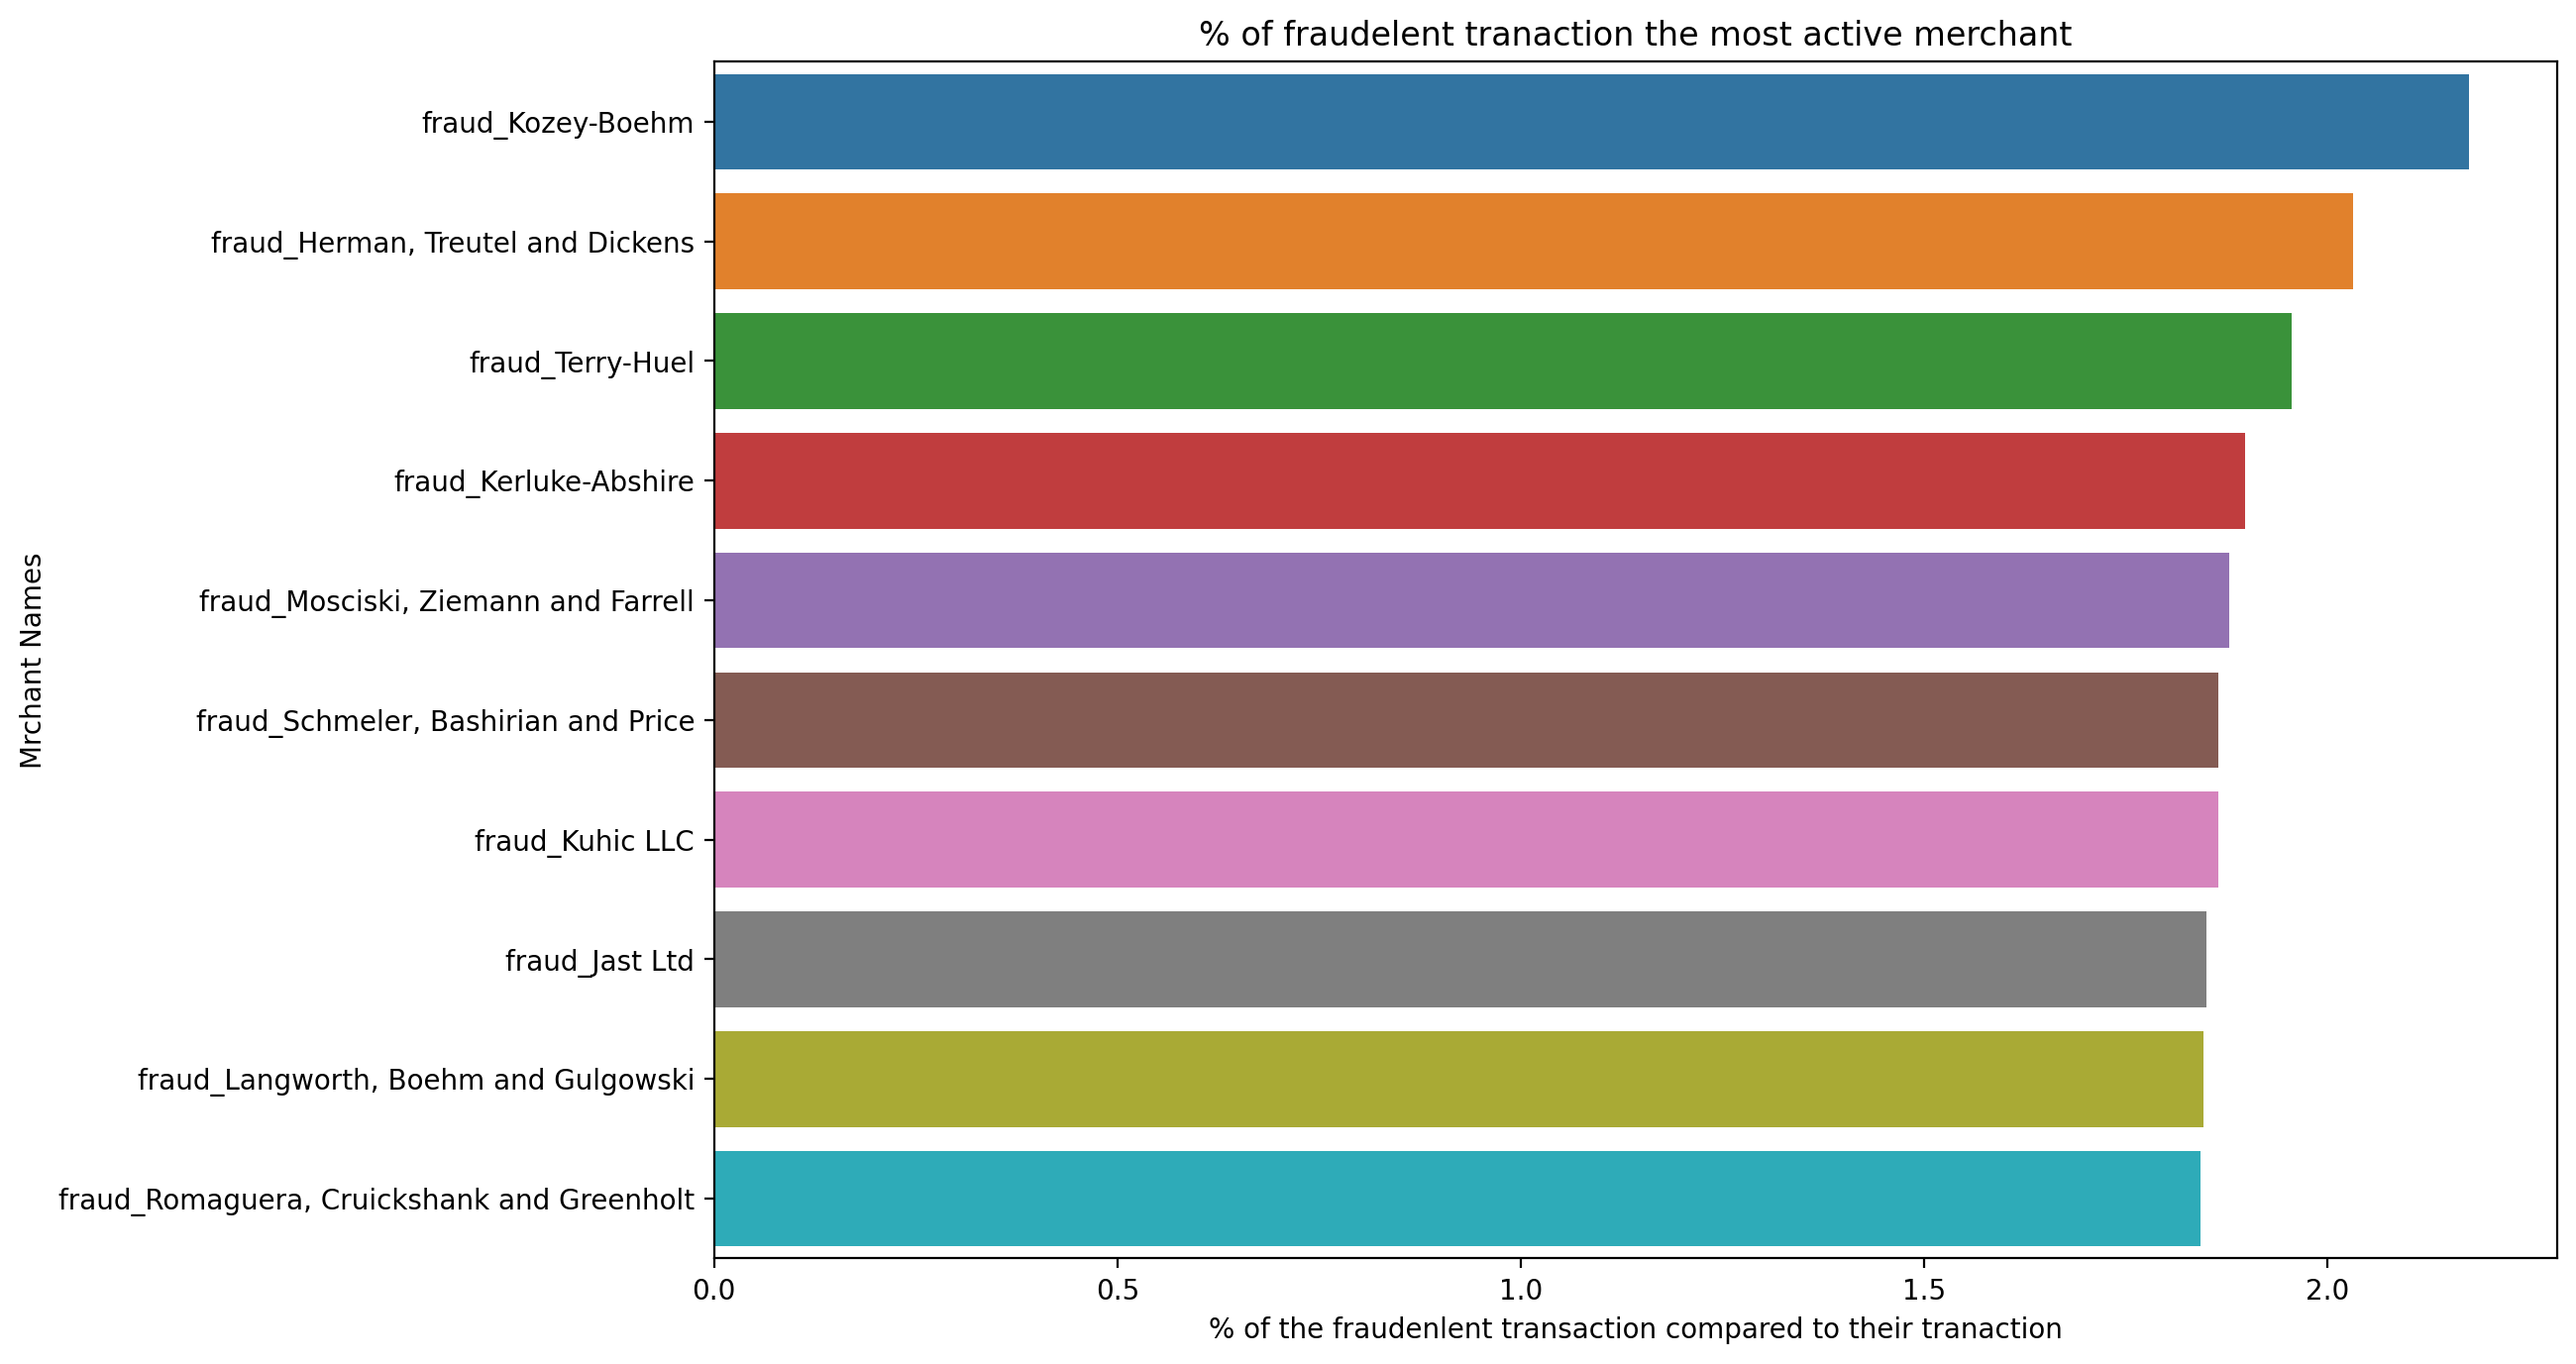

In [18]:
f=data[['merchant','is_fraud']].groupby('merchant').count().sort_values('is_fraud')
frauds=data[data['is_fraud']==1]
g=frauds[['merchant','is_fraud']].groupby('merchant').count().sort_values('is_fraud')
results_merchant=pd.merge(left=f,right=g,on='merchant')

results_merchant.columns=['total','faulty']
results_merchant['%frauds']=results_merchant['faulty']*100/results_merchant['total']
results_merchant.sort_values('%frauds',ascending=False)
#analysing
def analyse(string):
#     filtreing
    sample=data[data['merchant']==string]
    print(f"analising{string}")
    #analysing time
    #mean of amt
    return sample.describe()
results_merchant=results_merchant.sort_values('%frauds',ascending=False).reset_index()
plt.figure(figsize=(12,8),dpi=200)
ax=sns.barplot(x='%frauds',y='merchant',data=results_merchant[:10])
ax.set_title("% of fraudelent tranaction the most active merchant")
ax.set_ylabel('Mrchant Names')
ax.set_xlabel('% of the fraudenlent transaction compared to their tranaction')

### observation and precaution
      this merchant should be controled more offten

### encode the categoricale features and scaling

In [19]:
### first lets try with the lR but before:
# *)encode the categorical feature,since  the cc_num and the marcvhant are too much to encode and we cant risk droping some and overfitting the model
##creating dummy variable:
def to_dummy(column):
     return pd.get_dummies(data[column],drop_first=True)
# for )category:
dummy_cat=to_dummy('category')
# for)gender
dummy_g=to_dummy('gender')
# for age
def zipping(age:int):
    if age <= 20 :
        return '0-20'
    elif 20<age<=40 :
        return '20-40'
    elif 40<age<=60 :
        return '40-60'
    elif 60<age<=80 :
        return '60-80'
    elif 80<age<=100 :
        return '80-100'
    elif age > 100 :
        return '>100'
data['age_holder']=np.vectorize(zipping)(data['age_holder'])
dummy_age=to_dummy('age_holder')
dummy_day=to_dummy('day_of_week')
dummy_month=to_dummy('month')
test=data.drop(['category','age_holder','cc_num','merchant','month','day_of_week','gender','city','zip'],axis=1)
test=pd.concat([test,dummy_g,dummy_age,dummy_day,dummy_cat,dummy_month],axis=1)


#scaling
scaler = sd()
X= scaler.fit_transform(test)

In [20]:
dummy_month

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1852389,0,1,0,0,0,0,0,0,0,0,0
1852390,0,1,0,0,0,0,0,0,0,0,0
1852391,0,1,0,0,0,0,0,0,0,0,0
1852392,0,1,0,0,0,0,0,0,0,0,0


In [21]:
test

,amt,is_fraud,hour,year,M,20-40,40-60,60-80,80-100,Monday,...,December,February,January,July,June,March,May,November,October,September
0,4.97,0,0,2019,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,107.23,0,0,2019,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,220.11,0,0,2019,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,45.00,0,0,2019,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,41.96,0,0,2019,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,43.77,0,23,2020,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1852390,111.84,0,23,2020,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1852391,86.88,0,23,2020,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1852392,7.99,0,23,2020,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [22]:
x_train=test.drop('is_fraud',axis=1)
y_train=test['is_fraud']

In [23]:
test

,amt,is_fraud,hour,year,M,20-40,40-60,60-80,80-100,Monday,...,December,February,January,July,June,March,May,November,October,September
0,4.97,0,0,2019,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,107.23,0,0,2019,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,220.11,0,0,2019,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,45.00,0,0,2019,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,41.96,0,0,2019,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,43.77,0,23,2020,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1852390,111.84,0,23,2020,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1852391,86.88,0,23,2020,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1852392,7.99,0,23,2020,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# BALENCING THE DATA USING THE OVER SAMPLING UNDER SAPMLING AND SMOC AND TEST WITH EACH CASE

###### now that we encode our data we will  implement diffrente Classifier and compare their performance using the AUC to finaly choose which one we 'd pick up

In [24]:
import joblib
def split_scale(data,option=None):
    x_train=data.drop('is_fraud',axis=1)
    y_train=data['is_fraud']
    scaler = sd()
    x_train = scaler.fit_transform(x_train)
    if option!=None:
        try:
            x_train,y_train=eval(option)(x_train,y_train)
            
        except:
                raise ValueError("option must be valid string")
    

    return train_test_split(x_train,y_train,test_size=0.4,random_state=42)
def display_score(model,data,grid=None,option=None):
    x_train,x_test,y_train,y_test=split_scale(data,option) 
    x_test = scaler.fit_transform(x_test)
    name=model.__class__.__name__
    if option:
        name+=" with '"+option+"' fitting "
    if grid:
        model=GridSearchCV(estimator=model,param_grid=grid,cv=5)
    
    model.fit(x_train,y_train)
    scores=cross_val_score(model,x_train,y_train,cv=5)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    y_pred = model.predict(x_test)
    ac=accuracy_score(y_pred,y_test)
    ps=precision_score(y_pred,y_test)
    recall=recall_score(y_pred,y_test)
    rc=roc_auc_score(y_pred,y_test)
    collection=[[name,train_score,test_score,ac,ps,rc,recall]]
#     plot_roc_curve(model,x_test,y_test)
    sample=pd.DataFrame(collection,columns=['model_name','train score','test_score','accuracy_score','precision','auc_score','recall'])
#     print(sample)
#extrtact the score of this params and them tp the sample
    if grid:
        name+=f":withgridsearch{str(mode.best_params_)}"
    joblib.dump(model,f"./models/{name}.pkl")
        
    return sample    
# .over sampling
def over(x_train,y_train):
    '''return the over samplade data'''
    roc=RandomOverSampler()
    new_x,new_y=roc.fit_resample(x_train,y_train)
    return (new_x,new_y)
    
# .under samplung
def under(x_train,y_train):
    '''return the under sample'''
    ruc=RandomUnderSampler()
    new_x,new_y=ruc.fit_resample(x_train,y_train)
    return (new_x,new_y)

# .smote
def smote(x_train,y_train):
    '''return data using the SMOTe technique'''
    soc=SMOTE()
    new_x,new_y=soc.fit_resample(x_train,y_train)
    return (new_x,new_y)
# AUC for diffrent MODel in one graphe
def AUC(data,clfs=None,option=None):
    if clfs:
        re=pl=pd.DataFrame(columns=['model_name','train score','test_score','accuracy_score','precision','auc_score'])
        for i in clfs:
            Auc=display_score(i,test)
            re=pd.concat([re,Auc])
            if op:
                for j in op:
                    Auc=display_score(i,test,option=j)
                    re=pd.concat([re,Auc])
            
  
        return re
    
#gridsearch

In [25]:
# op=['under','over','smote']
clf=[RandomForestClassifier(n_estimators=150,n_jobs=2,random_state=42,max_depth=4)]
RF=AUC(test,clf,op)
    

NameError: name 'op' is not defined

In [ ]:
op=['under','over','smote']
clf=[LogisticRegression(max_iter=350,random_state=0)]
LR=AUC(test,clf,op)

In [ ]:
rf=GridSearchCV(RandomForestClassifier(),)

In [ ]:
rf=RandomForestClassifier()
{'n_estimator',[150,200,300,500,800],'max_depth':[5,8,15,25],'min_sample_split',[2,5,10,15],'min_sampe_leaf',[1,2,5]}

### model implementation
build an APi to interact with the new data:
visit the API Folder to get the api 


In [1]:
# model=joblib.load("C:/Users/PC/fraude detect/observation/models/LinearSVC with 'under' fitting .pkl")

# fraud_sample=test[test['is_fraud']==1][7:25].drop('is_fraud',axis=1).reset_index(drop=True)
# scaler = sd()
# sample=scaler.fit_transform(fraud_sample)
# prediction=model.predict_proba(sample)

# d={i:prediction[i] for i in range(len(prediction))}
# print(d)
# test[test['is_fraud']==1][12:19].reset_index(drop=True)

In [2]:
# model=joblib.load("C:/Users/PC/fraude detect/observation/models/LinearSVC with 'under' fitting .pkl")

# fraud_sample=test[test['is_fraud']==0][7:1007].drop('is_fraud',axis=1).reset_index(drop=True)
# scaler = sd()
# sample=scaler.fit_transform(fraud_sample)
# prediction=model.predict(sample)

# d={i:prediction[i] for i in range(len(prediction))}
# print(d)
# test[test['is_fraud']==0][12:19].reset_index(drop=True)

In [ ]:

# fraud_sample=test[test['is_fraud']==0][12:19].drop('is_fraud',axis=1).reset_index(drop=True)
# scaler = sd()
# sample=scaler.fit_transform(fraud_sample)
# prediction=model.predict_proba(sample)

# d={i:prediction[i] for i in range(len(prediction))}
# print(d)
# test[test['is_fraud']==0][12:19].reset_index(drop=True)

In [ ]:
# g={'n_estimators':[150,200,300,500,800],'max_depth':[5,8,15,25],'min_samples_split':[2,5,10,15],'min_samples_leaf':[1,2,5]}
# op='smote'
# clf=RandomForestClassifier(random_state=0)
# result=display_score(clf,test,grid=g,option=op)